In [25]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

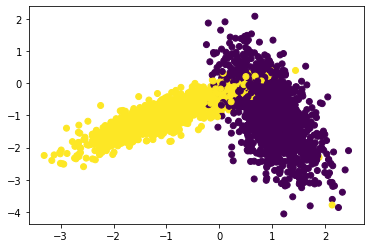

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(x_test[:,0], x_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCv



<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [19]:
def get_params(pr):
  '''
  This Function generates the unique random numbers from uniform-distribution.
  '''
  if isinstance(pr,tuple): # checking whether param_range is tuple or not.
    if pr[0]<pr[1] and pr[0]>=0 and pr[1]>0: # conditioning on (low and high) values of tuple to be +ve.
      s = set()
      for i in range(100): # This for-loop generates unique random numbers from uniform-distribution.
        s.add(int(np.random.uniform(low = pr[0],high = pr[1],size=1)))
        if len(s)==10:
          params = list(s)
          break
  return params

def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
  k = get_params(param_range)  # K: Unique Random numbers generated and stored in K.
  tr = dict() # tr dict is used to store unique k-values and their corresponding accuraccy for Training data.
  ts = dict() # ts dict is used to store unique k-values and their corresponding accuraccy for Testing data.
  model = classifier
  fold_size = int(len(x_train)/folds)
  for i in tqdm(k): # This for-loop is to compute the accuraccy for different k-values and store it in dict {tr and ts}.
    indx = list(range(0,len(x_train)))
    tr_cv_scores,ts_cv_scores = [],[]
    for j in range(folds):# This for-loop is to compute the cv-accuraccy for each fold w.r.t unique K.
      cv_indx = list(random.sample(indx,fold_size))
      tr_indx = list(set(list(range(0,len(x_train))))-set(cv_indx))
      for k in cv_indx:
        indx.remove(k)
      #print('cv_indx',cv_indx,'\n','tr_indx',tr_indx)
      x_tr,x_cv = x_train[tr_indx],x_train[cv_indx]
      y_tr,y_cv = y_train[tr_indx],y_train[cv_indx]
      model.n_neighbors = i
      model.fit(x_tr,y_tr)
      tr_cv_scores.append(accuracy_score(y_tr, (model.predict(x_tr))))
      ts_cv_scores.append(accuracy_score(y_cv, (model.predict(x_cv))))
    tr[i] = np.mean(tr_cv_scores)
    ts[i] = np.mean(ts_cv_scores)
  #print(tr,'\n',ts)
  return tr,ts
    






In [20]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

100%|██████████| 10/10 [00:22<00:00,  2.22s/it]


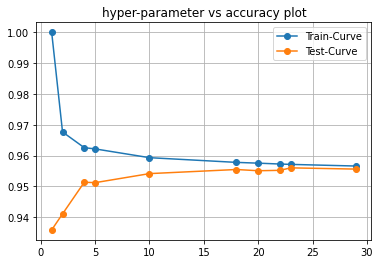

In [21]:
classifier = KNeighborsClassifier()
param_range = (1,32)
folds = 10 
tr_score,ts_score = RandomSearchCV(x_train,y_train,classifier, param_range, folds)
plt.grid()
plt.plot(list(tr_score.keys()),list(tr_score.values()),'-o',label = 'Train-Curve')
plt.plot(list(ts_score.keys()),list(ts_score.values()),'-o',label = 'Test-Curve')
plt.title('hyper-parameter vs accuracy plot')
plt.legend()
plt.show()


In [23]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

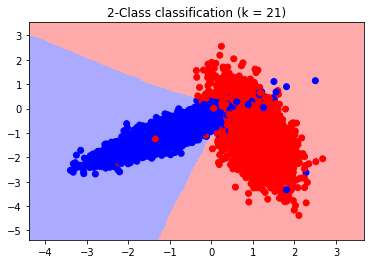

In [24]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 21)
neigh.fit(x_train, y_train)
plot_decision_boundary(x_train[:, 0], x_train[:, 1], y_train, neigh)